## MEANDERPY


'meanderpy' is a Python module that implements a simple numerical model of meandering, the one described by Howard & Knutson in their 1984 paper "Sufficient Conditions for River Meandering: A Simulation Approach". This is a kinematic model that is based on computing migration rate as the weighted sum of upstream curvatures; flow velocity does not enter the equation. Curvature is transformed into a 'nominal migration rate' through multiplication with a migration rate (or erodibility) constant; in the [Howard and Knutson, 1984] paper this is a nonlinear relationship based on field observations that suggested a complex link between curvature and migration rate.

In the 'meanderpy' module we use a simple linear relationship between the nominal migration rate and curvature, as recent work using time-lapse satellite imagery suggests that high curvatures result in high migration rates
[Sylvester et al., 2019].

You can read more about the model, find references at: https://csdms.colorado.edu/wiki/Model:Meanderpy.

Learning Objectives: 
- learn about the planview morphology of meandering rivers
- learn how to quantify sinuosity, relationship between slope, 
- learn how meandering rivers migrate 

Python skills: 
- learn how to save a plot, and make a movie from a model simulation
- implement basic calculations of river hydraulics and morphological relationships

The core of the notebook has originally been created by Zoltan Sylvester. 
It was modified for Sedimentary System Modeling by Irina Overeem, October 2, 2019.

[Sylvester et al., 2019]: https://pubs.geoscienceworld.org/gsa/geology/article/47/3/263/568705/high-curvatures-drive-river-meandering
[Howard and Knutson, 1984]: http://dx.doi.org/10.1029/WR020i011p01659




In [1]:
import meanderpy as mp
import matplotlib.pyplot as plt

#NOTE THIS LINE HAS BEEN ADDED TO ALLOW FOR INTERACTIVE INPUT
#THIS ONLY WORKS ON LOCAL PC NOT ON JUPYTERHUB
#%matplotlib qt

In [2]:
help(mp)

Help on module meanderpy:

NAME
    meanderpy

CLASSES
    builtins.object
        Channel
        ChannelBelt
        ChannelBelt3D
        Cutoff
    
    class Channel(builtins.object)
     |  Channel(x, y, z, W, D)
     |  
     |  class for Channel objects
     |  
     |  Methods defined here:
     |  
     |  __init__(self, x, y, z, W, D)
     |      initialize Channel object
     |      x, y, z  - coordinates of centerline
     |      W - channel width
     |      D - channel depth
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
    class ChannelBelt(builtins.object)
     |  ChannelBelt(channels, cutoffs, cl_times, cutoff_times)
     |  
     |  class for ChannelBelt objects
     |  
     |  Methods defined here:
     |  

## Input parameters

In [3]:
W = 200.0                    # channel width (m), original setting 200m
D = 12.0                     # channel depth (m), original setting 16m
pad = 100                    # padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline
nit = 2000                   # number of iterations
Cf = 0.022                    # dimensionless Chezy friction factor
crdist = 2.0*W                 # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0E-11                # vertical slope-dependent erosion rate constant (m/s)
dt = 0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 30                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.01                    # initial slope (matters more for submarine channels than rivers)
t1 = 500                     # time step when incision starts
t2 = 700                     # time step when lateral migration starts
t3 = 1400                    # time step when aggradation starts
aggr_factor = 4e-9           # aggradation factor (earlier set at 2)

## Initialize model

In [4]:
from imp import reload
reload(mp)
# This initialzation can create a straight line, with some noise added. 
# However, a Channel can be created (and then used as the first channel in a ChannelBelt) using any set of x,y,z,W,D variables.
ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel for zero-th timestep
chb = mp.ChannelBelt(channels=[ch],cutoffs=[],cl_times=[0.0],cutoff_times=[]) # create channel belt object

## Run a base-case simulation

The core functionality of 'meanderpy' is built into the 'migrate' method of the 'ChannelBelt' class. This is the function that computes migration rates and moves the channel centerline to its new position. The last Channel of a ChannelBelt can be further migrated through applying the 'migrate' method to the ChannelBelt instance.

In [5]:
# run the migrate method on your 
chb.migrate(nit,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chb.plot('strat',20,60) # plotting

Percent: [####################] 99.95% 0000000001%   

In [6]:
# get some basic information on the plot method for the channel belt object
help(chb.plot)

Help on method plot in module meanderpy:

plot(plot_type, pb_age, ob_age, *end_time) method of meanderpy.ChannelBelt instance
    plot ChannelBelt object
    plot_type - can be either 'strat' (for stratigraphic plot) or 'morph' (for morphologic plot)
    pb_age - age of point bars (in years) at which they get covered by vegetation
    ob_age - age of oxbow lakes (in years) at which they get covered by vegetation
    end_time (optional) - age of last channel to be plotted (in years)



In [6]:
# migrate an additional 1000 iterations and plot stratigraphic results
chb.migrate(1000,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens, t1,t2,t3,aggr_factor)
fig = chb.plot('strat',20,60)

Percent: [####################] 99.9% 99999999999%  

## <font color = green> Assignment 1 </font> 
Describe the plot you have generated with the meanderpy simulation. What is the approximate width of the channel belt? How many cut-offs have been generated? Over how many iterations? 
Let's say a similar channel belt was formed during the Cretaceous and is now buried in the subsurface. And you'd assume that individual pointbars consist of sandy material with relatively high porosity and permeability. Would such a channel belt be a good reservoir? Why? 

And lastly, is there any indication that the model does not mimick real processes well? Explain what is off and form an hypothesis about why this is.

In [ ]:
# your text goes here
# on width
#on cutoffs
# on reservoir quality
# on model 

In [7]:
# migrate an additional 5 iterations and plot morphology with revegetated previous channel pointbars and oxbows
chb.migrate(5,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens, t1,t2,t3,aggr_factor)
fig = chb.plot('morph',10,100)

Percent: [################----] 80.0% 

## <font color = green> Assignment 2 </font> 
Write code to print out your generated figure as a PNG file. 

Describe the morphological plot you have generated. What do you see? Why is this plot different from the previous one? What values did you set for rate of vegetation growth in the floodplain? Do you think those timespans are realistic values for the revegetation? 

How many cutoffs do you see?
What do you expect about the stratigraphic signature of a cutoff in the subsurface?

In [18]:
# your code to create a PNG file goes here


In [ ]:
#  Answers to Assignment 2


## <font color = green> Assignment 3 </font> 
What is the estimated sinuosity of the active channel? 
Recall: sinuosity = channel center line length/valley length

In [ ]:
# your answer goes here

In [19]:
#chb.create_movie(xmin,xmax,plot_type,filename,dirname,pb_age,ob_age,scale,end_time)
chb.create_movie(5000,30000,'strat','basecase','movie',10,100,2,2000)

# Set up a case to mimick the Colorado River near Kremmling, CO

In out first practive notebook we looked at a USGS daily discharge record for the Colorado River near Kremmling, CO. 
In that zone, the Colorado River has a meandering morphology.

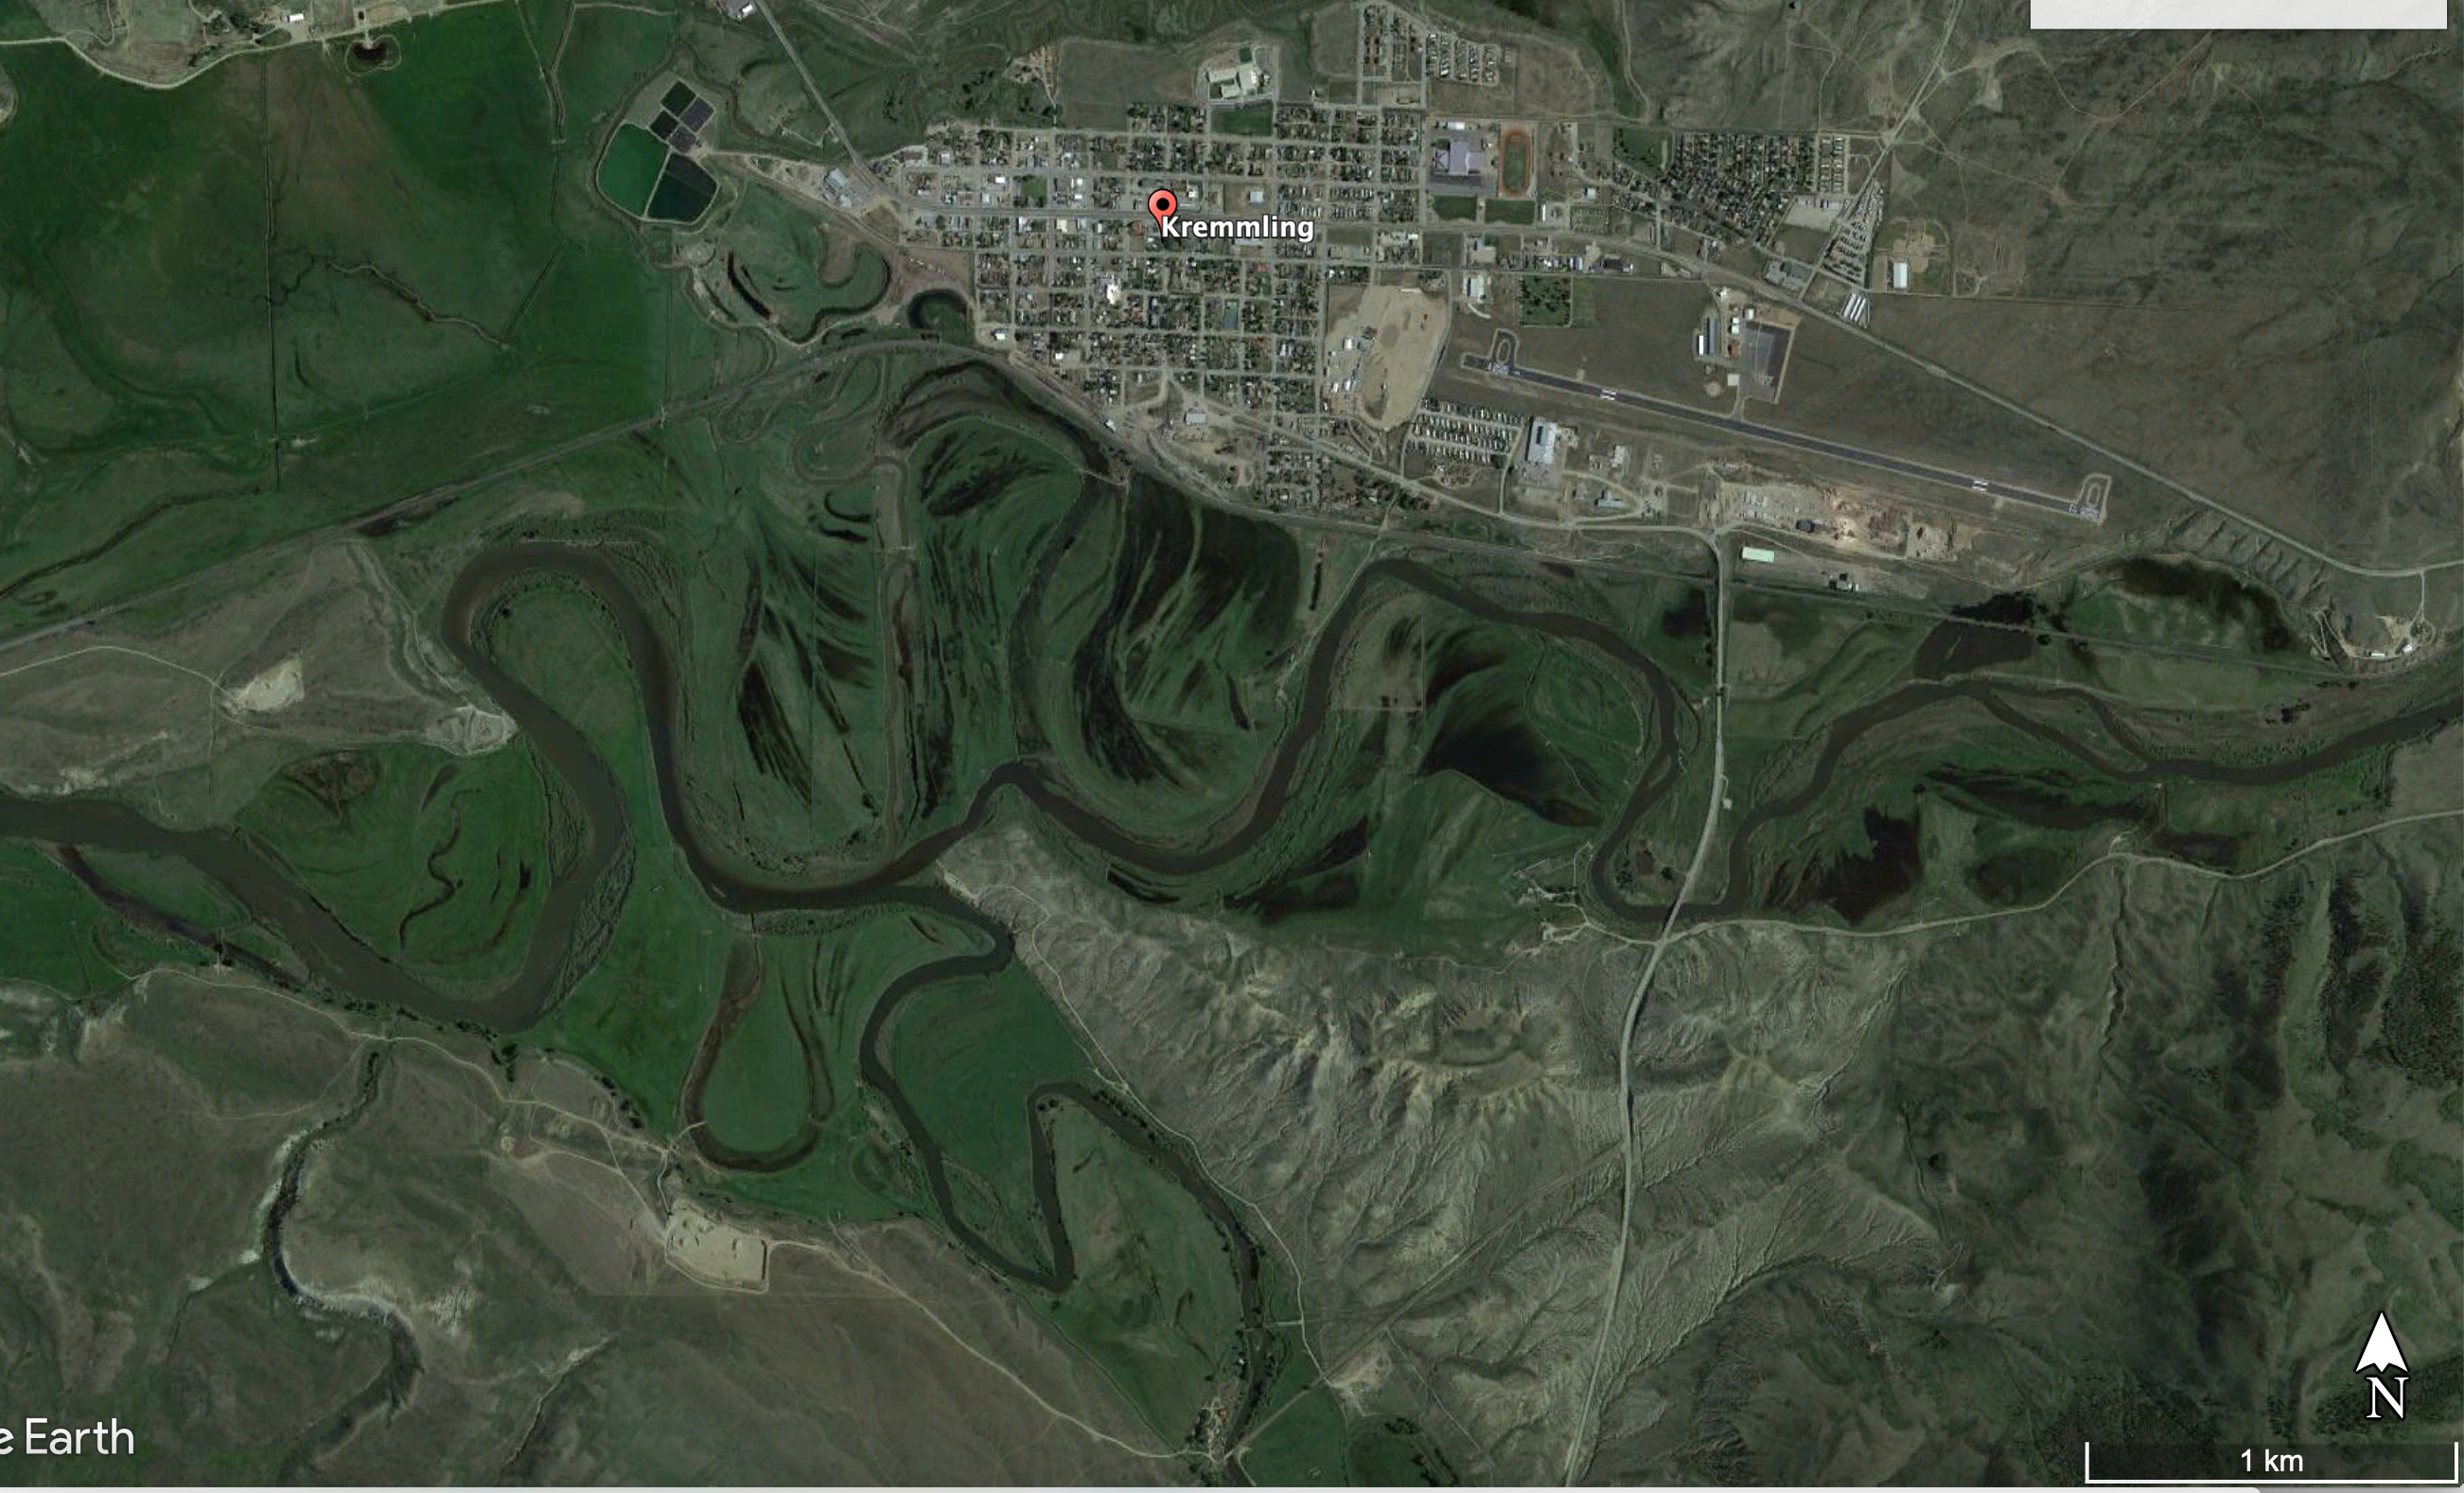

## <font color = green> Assignment 4</font> 

To set the width and depth for the Colorado River at Kremmling, we can use some hydraulic geometry relationships. These relationships relate river width, W, river depth, D to its discharge, Q.

From the USGS record I sellected all peak river discharges at the gauge for 1964-2016, then I calculated the mean of those peaks and the standard deviation:
mean Qpeak	5535.014286 cuft/sec
std Qpeak	4523.502332 cuft/sec

Convert these river discharge statistics to m3/sec

Discuss how this is not the common way of defining bankfull discharge.
How would you have determined bankfull discharge?

In [ ]:
#Your code to convert peak discharge and its standard deviation goes here
# print out the answer

In [ ]:
# Your discussion on Qbf goes here. Mention the recurrence interval of bankfull discharge

## <font color = green> Assignment 5</font> 

 A hydraulic geometry relationship between bankfull discharge and river width is given as W=3.65Qb0.50 
(van den Berg, 1995) from analysis of approx. 300 rivers and their geometry.

Write a calculation for width based on the mean peak discharge given above.
Write a loop with a few increments around your calculation that looks at the possible variation of peak discharge
create a plot that shows a distribution

In [ ]:
# your code for the calculation of width W from the mean of all peak discharges goes here

In [ ]:
# your code that calculates a distribution of widths (w) based on the distribution of the peak Q goes here
# plot a Q-W relationship for the Colorado river

## <font color = green> Assignment 6</font> 
Manipulate the meanderpy model inputs so that the width (W) and depth (D) of the initial channel 
are more similar for the case of the Colorado River at Kremmling 

In [ ]:
import meanderpy as mpco
import matplotlib.pyplot as plt

In [7]:
# Manipulate the meanderpy model inputs so that the width (W) and depth (D) of the initial channel 
# are more similar for the case of the Colorado River at Kremmling 

W = 200.0                    # channel width (m), original setting 200m
D = 6.0                     # channel depth (m), original setting 16m
pad = 100                    # padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline
nit = 2000                   # number of iterations
Cf = 0.022                    # dimensionless Chezy friction factor
crdist = 2.0*W                 # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0E-11                # vertical slope-dependent erosion rate constant (m/s)
dt = 0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 30                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.01                    # initial slope (matters more for submarine channels than rivers)
t1 = 500                     # time step when incision starts
t2 = 700                     # time step when lateral migration starts
t3 = 14000                    # time step when aggradation starts
aggr_factor = 2              # aggradation factor (it kicks in after t3)

In [ ]:
from imp import reload
reload(mpco)
# This initialzation can create a straight line, with some noise added. 
# However, a Channel can be created (and then used as the first channel in a ChannelBelt) using any set of x,y,z,W,D variables.
chco = mpco.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel for zero-th timestep
chbco = mpco.ChannelBelt(channels=[ch],cutoffs=[],cl_times=[0.0],cutoff_times=[]) # create channel belt object

In [ ]:
# run the migrate method on your new simulation 
chbco.migrate(nit,saved_ts,deltas,pad,crdist,Cf,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chbco.plot('strat',20,60) # plotting

In [ ]:
# your code to create a morphological plot for your realization goes here

In [ ]:
plt.show(fig)

## <font color = green> Assignment 7</font> 
So you manipulated the meanderpy model inputs so that the width (W) and depth (D) of the initial channel 
are more similar for the case of the Colorado River at Kremmling. 
Then you ran the simulation. How does it compare visually to the Colorado River at Kremmling? 
Go to google earth, find the location and measure the channel width at a couple of places. How does it compare?

In [ ]:
# your discussion of visual similarity goes here.
# report your measured channel widths of the realworld channel here
# how does the sinuosity of the simulated channel and the real-world channel at this stretch compare?
# What would be reasons for a mismatch?

## <font color = green> Assignment 8 </font> 

Set up an experiment for the Colorado River that tries to take into account the hydraulic roughness. 
Typically roughness is influenced by bed material size (D50, D84, ks, zo, ng); Relative roughness (h/D50); Presence of sediment transport, possibly by bedforms and barforms, by vegetation; Obstructions (tree
stumps, logs, boulders, bedrock outcrops, etc), but also by feedbacks of variations in channel width and depth, and sinuosity. 

Explore what is meant by the Chezy friction factor.

In [ ]:
# state the definition of the Chezy friction factor here
# what would be a reasonable range to expect this parameter to vary?


In [ ]:
# set up and experiment and plot output for one extreme end of the Chezy friction factor


# BONUS - 5700 level Graduate Students - Built a 3d Fluvial Model

Meanderpy' includes the functionality to build 3D stratigraphic models. However, this functionality is decoupled from the centerline generation, mainly because it would be computationally expensive to generate surfaces for all centerlines, along their whole lengths. Instead, the 3D model is only created after a Channelbelt object has been generated; a model domain is defined either through specifying the xmin, xmax, ymin, ymax coordinates.

From the github repository, check out the notes on the meanderpy 3D functionality
https://github.com/zsylvester/meanderpy

In [11]:
# THIS ONLY WORKS ON LOCAL PC NOT ON JUPYTERHUB
# REMEMBER TO UNCOMMENT %matplotlib qt 

# Use this code to select a section of your simulated channelbelt 
# and built a synthetic stratigraphy of those floodplain deposits

h_mud = 0.4 # maximum thickness of overbank deposit for each time step
dx = 10.0 # gridcell size in meters

chb_3d, xmin, xmax, ymin, ymax = chb.build_3d_model('fluvial',h_mud=h_mud,levee_width=4000.0,h=12.0,w=W,bth=0.0,
                            dcr=10.0,dx=dx,delta_s=deltas,starttime=chb.cl_times[0],endtime=chb.cl_times[-1],
                            xmin=0,xmax=0,ymin=0,ymax=0)

Percent: [####################] 99.01960784313727%  

In [12]:
# create plots, with this setting you make a X-section at x=100
fig1,fig2,fig3 = chb_3d.plot_xsection(100, [[0.5,0.25,0],[0.9,0.9,0],[0.5,0.25,0]], 10)

## <font color = green> Assignment 9 </font> 

In [ ]:
# save a multipanel figure that shows your fig1, fig2, fig3

# give a short description of the features in the planviews and x-section and add it as a figure title



Describe here the way erosion (or also called incision) is calculated to create the 3D model. 
Describe how aggradation is modeled.
Would you have used a similar approach? If yes, what is good about this approach? 
If no, what would you have done instead?

Hint: go to the github repository of meanderpy and check out the READ.ME file.


In [ ]:
# Your answers can be listed here

## <font color = green> Assignment 10 </font> 

In [ ]:
# rerun the code with a different aggradation rate and with less iterations
# create a 2 crossections, one that isolates a single oxbow lake, one that cuts through a pointbar
# make 2 figures and describe them

In [ ]:
# your code for the figures goes here

In [ ]:
# your description goes here